# 1. Подготовка среды

In [5]:
!pip install numpy tensorflow

# 2. Импорт необходимых библиотек

In [6]:
import numpy as np
import tensorflow as tf

# 3. Загрузка данных MNIST

In [7]:
# Загрузка данных MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Нормализация данных
train_images = train_images / 255.0
test_images = test_images / 255.0

# Преобразование меток в one-hot представление
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

train_labels = one_hot_encode(train_labels, 10)
test_labels = one_hot_encode(test_labels, 10)

11490434/11490434 [==============================] - 0s 0us/step


# 4. Определение однослойного персептрона и функций активации

In [8]:
class Perceptron:
    def __init__(self, input_size, num_classes, learning_rate=0.01):
        self.weights = np.random.uniform(-0.03, 0.03, (input_size, num_classes))
        self.biases = np.random.uniform(-0.03, 0.03, (num_classes,))
        self.learning_rate = learning_rate

    def activation(self, x):
        return 1 / (1 + np.exp(-x))  # Сигмоидальная функция

    def activation_derivative(self, x):
        return x * (1 - x)

    def predict(self, inputs):
        net_inputs = np.dot(inputs, self.weights) + self.biases
        return self.activation(net_inputs)

    def train(self, inputs, labels, epochs, stop_criterion=0.01):
        for epoch in range(epochs):
            total_error = 0
            for x, y in zip(inputs, labels):
                # Прямое распространение
                outputs = self.predict(x)
                errors = y - outputs

                # Обратное распространение
                self.weights += self.learning_rate * np.outer(x, errors * self.activation_derivative(outputs))
                self.biases += self.learning_rate * errors * self.activation_derivative(outputs)

                total_error += np.sum(errors**2)

            if total_error / len(inputs) < stop_criterion:
                break
            print(f'Epoch {epoch + 1}, Error: {total_error / len(inputs)}')

# Инициализация и обучение персептрона
input_size = train_images.shape[1] * train_images.shape[2]
num_classes = 10
perceptron = Perceptron(input_size, num_classes, learning_rate=0.1)

# Развернуть изображения в векторы
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

perceptron.train(train_images_flat, train_labels, epochs=100)

Epoch 1, Error: 0.2016415878074219
Epoch 2, Error: 0.1697517234546272
Epoch 3, Error: 0.163015440651812
Epoch 4, Error: 0.15924491439643654
Epoch 5, Error: 0.15669133560060813
Epoch 6, Error: 0.1547897588805701
Epoch 7, Error: 0.15328063584547227
Epoch 8, Error: 0.15203647757756025
Epoch 9, Error: 0.1509825472173954
Epoch 10, Error: 0.15007122087365968
Epoch 11, Error: 0.14926953225974446
Epoch 12, Error: 0.14855371383445462
Epoch 13, Error: 0.1479081995811368
Epoch 14, Error: 0.147322045647571
Epoch 15, Error: 0.14678599410688845
Epoch 16, Error: 0.14629216294709407
Epoch 17, Error: 0.14583419415785925
Epoch 18, Error: 0.14540707187639434
Epoch 19, Error: 0.14500687197132636
Epoch 20, Error: 0.14463035542793085
Epoch 21, Error: 0.1442746287320077
Epoch 22, Error: 0.14393716766203327
Epoch 23, Error: 0.14361595722261639
Epoch 24, Error: 0.14330949976051
Epoch 25, Error: 0.1430166563784968
Epoch 26, Error: 0.14273645134077273
Epoch 27, Error: 0.14246799780171102
Epoch 28, Error: 0.14221

# 5. Оценка качества работы

In [9]:
# Оценка на тестовой выборке
predictions = perceptron.predict(test_images_flat)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(test_labels, axis=1)

accuracy = np.mean(predicted_labels == actual_labels)
print(f'Точность (accuracy): {accuracy * 100}%')

Точность (accuracy): 91.75%


# 6. Визуализация модели

In [10]:
!pip install matplotlib networkx

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

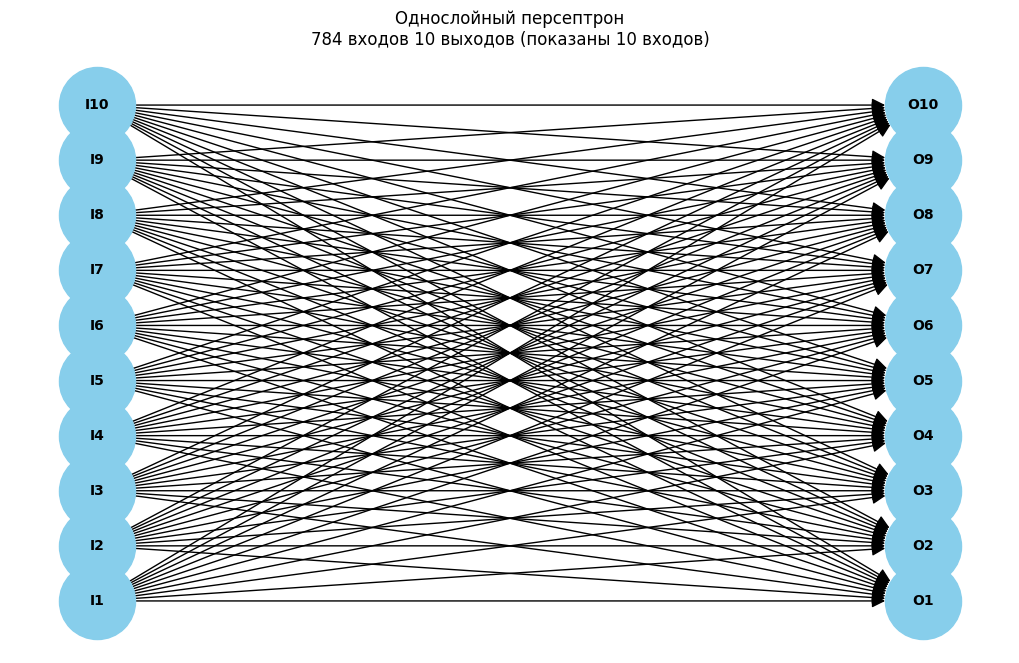

In [14]:
def draw_perceptron(input_size, output_size, sample_input_size=10):
    G = nx.DiGraph()

    input_layer = [f'I{i+1}' for i in range(sample_input_size)]
    output_layer = [f'O{i+1}' for i in range(output_size)]

    for i in range(sample_input_size):
        for j in range(output_size):
            G.add_edge(input_layer[i], output_layer[j])

    pos = {}
    pos.update((node, (0, i)) for i, node in enumerate(input_layer))
    pos.update((node, (1, i)) for i, node in enumerate(output_layer))

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title(f'Однослойный персептрон\n{input_size} входов {output_size} выходов (показаны {sample_input_size} входов)')
    plt.show()

# Определите размеры входного и выходного слоя
input_size = 784  # 28x28 pixels
output_size = 10  # 10 classes

# Визуализация персептрона (образец)
draw_perceptron(input_size, output_size)